In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

from mtt.smc_phd import SMCPHD
from mtt.simulator import Simulator
from mtt.data import OnlineDataset
from mtt.utils import compute_ospa

In [90]:
dataset = OnlineDataset()
data = list(dataset.iter_simulation())

In [91]:
simulator = data[0].simulator
smc_phd = SMCPHD(simulator, particles_per_target=1000, adaptive_birth=True)

predictions_phd = []
for d in tqdm(data):
    smc_phd.step(d.measurements)
    predictions_phd.append(smc_phd.extract_states())

100%|██████████| 100/100 [01:09<00:00,  1.44it/s]


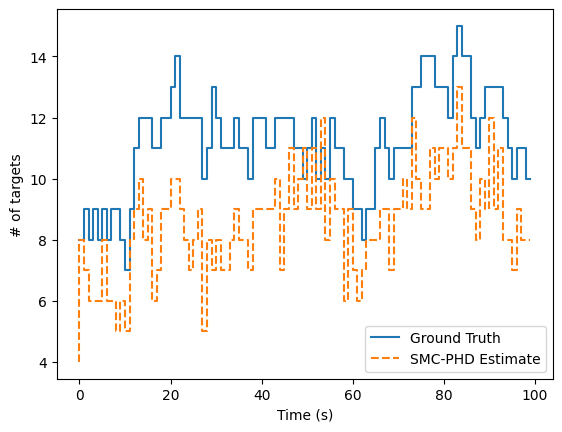

In [92]:
card_true = [len(d.target_positions) for d in data]
card_phd = [len(p) for p in predictions_phd]

# plot cardinality
plt.step(np.arange(len(data)), card_true, label="Ground Truth")
plt.step(np.arange(len(data)), card_phd, label="SMC-PHD Estimate", linestyle="dashed")
plt.xlabel("Time (s)")
plt.ylabel("# of targets")
plt.legend()

168.4699363061406


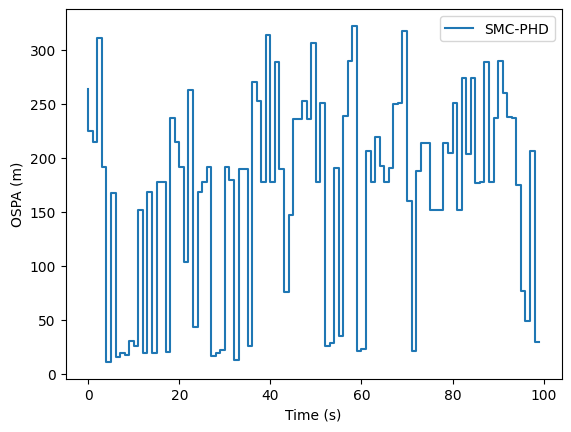

In [74]:
ospa_phd = []
for idx in range(len(data)):
    ospa_phd += [compute_ospa(data[idx].target_positions, np.asarray(predictions_phd[idx])[:,:2], 500)]
print(np.mean(ospa_phd))

plt.figure()
plt.step(np.arange(len(data)), ospa_phd, label="SMC-PHD")
plt.ylabel("OSPA (m)")
plt.xlabel("Time (s)")
plt.legend()